# Air Quality in Istanbul between 2014.01 - 2020.07

 -*- coding: utf-8 -*-


Created on Thursday Aug  2 21:34:41 2020

@author: erolerdogan


**T	:**Average Temperature (°C)

**TM:**Maximum temperature (°C)

**Tm:**Minimum temperature (°C)

**SLP:**	Atmospheric pressure at sea level (hPa)

**H	:** Average relative humidity (%)

**PP:**Total rainfall and / or snowmelt (mm)

**VV:**Average visibility (Km)

**V	:**Average wind speed (Km/h)

**VM:**Maximum sustained wind speed (Km/h)

**VG:**Maximum speed of wind (Km/h)

**RA:**Indicate if there was rain or drizzle (In the monthly average, total days it rained)

**SN:**Snow indicator (In the monthly average, total days that snowed)

**TS:**Indicates whether there storm (In the monthly average, Total days with thunderstorm)

**FG:**Indicates whether there was fog (In the monthly average, Total days with fog)

### Data Sources

1. AQI (PM2.5, PM10 etc) => https://aqicn.org/data-platform/register/
2. The data between 2017-2020 from Turkey => https://sim.csb.gov.tr/
3. Details (T, TM, Tm etc.) => https://en.tutiempo.net/istanbul.html
4. http://www.havaizleme.gov.tr/


### Useful Links to understand project items better

1. PM2.5 vs PM10 => https://smartairfilters.com/en/blog/pm10-pm2-5-difference-particle-air-pollution/
2. Conversion from PM10 to PM2.5 => https://www.epd.gov.hk/epd/english/environmentinhk/air/guide_ref/guide_aqa_model_g5.html
3. Equation of calculating Air Quality Index => https://en.wikipedia.org/wiki/Air_quality_index

## Data Importing and Understanding

In [1]:
import pandas as pd
import numpy as np

#### Air Quality Dataset from 1st source 

In [2]:
aqi_first = pd.read_csv("istanbul_aqi.csv", names=["Date", "pm2.5", "pm10", "o3", "no2", "so2", "co"], header=0)

aqi_first.head()

,Date,pm2.5,pm10,o3,no2,so2,co
0,2020/8/1,48,14,18,16,2,2
1,2020/8/2,42,11,17,11,1,1
2,2020/8/3,36,10,12,14,1,1
3,2020/8/4,28,9,,,,
4,2020/8/5,35,,,,,


#### Air Quality 2017-2020 dataset from Turkey ministry 2nd source

In [3]:
aqi_second = pd.read_excel("istanbul_besiktas_aqi_sim_2017-2020.xlsx", header=1,
                           names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"])

aqi_second.head()


,Date,pm10,so2,co,no2,o3,pm2.5
0,2017-01-02 00:00:56,NaN,13.10,436.68,100.37,20.86,NaN
1,2017-01-03 00:00:56,48.73,15.94,452.92,109.53,26.32,NaN
2,2017-01-04 00:00:56,58.86,12.93,585.75,120.80,16.18,NaN
3,2017-01-05 00:00:56,34.29,6.60,535.62,119.70,19.18,NaN
4,2017-01-06 00:00:56,30.91,6.57,457.47,91.04,24.16,NaN


#### Detailed Dataset (T, TM, Tm, PP etc.) from 3rd source

In [4]:
detailed_data = pd.read_csv("combined_data.csv")

detailed_data.head()

,Unnamed: 0,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG,Date
0,0,1,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,NaN,,,,,2014-1
1,1,2,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,NaN,,,,,2014-1
2,2,3,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,NaN,NaN,,,,2014-1
3,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,2014-1
4,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,2014-1


#### 2017-11 dataset (due to absence of this month)

In [5]:
data_201711 = pd.read_excel("istanbul_mecidiyekoy_aqi_2017-11.xlsx", header=3,
                            names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"])
data_201711.head()

,Date,pm10,so2,co,no2,o3,pm2.5
0,2017-11-01 00:00:56,46.91,NaN,356.11,72.09,174.21,NaN
1,2017-11-02 00:00:56,66.23,NaN,840.17,89.83,272.77,NaN
2,2017-11-03 00:00:56,67.95,NaN,840.88,75.24,195.60,NaN
3,2017-11-04 00:00:56,38.48,NaN,529.11,71.66,167.90,NaN
4,2017-11-05 00:00:56,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleansing and Manipulation

#### Working on Detailed Data

In [6]:
for i in range(len(detailed_data)):
    detailed_data.loc[i, "Date"] = str(detailed_data.Date[i]) + "-" + str(detailed_data.Day[i])

    
detailed_data_df = detailed_data.iloc[:, 2:-6].copy().join(detailed_data.iloc[:, -1])
detailed_data_df.Date = pd.to_datetime(detailed_data_df.Date).dt.strftime("%Y-%m-%d")
detailed_data_df.head()

,T,TM,Tm,SLP,H,PP,VV,V,VM,Date
0,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,2014-01-01
1,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,2014-01-02
2,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,2014-01-03
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-04
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05


In [7]:
detailed_data_df.shape

(2404, 10)

In [8]:
detailed_data_df.isna().sum()

T       1181
TM      1181
Tm      1181
SLP     2401
H       1183
PP      1217
VV      1311
V       1181
VM      1181
Date       0
dtype: int64

In [9]:
detailed_data_df.notna().sum()

T       1223
TM      1223
Tm      1223
SLP        3
H       1221
PP      1187
VV      1093
V       1223
VM      1223
Date    2404
dtype: int64

#### Working on Air Quality Data from 1st Source

In [10]:
# Changing empty or wrong cell's values as NaN values
aqi_first.replace(["", " "], np.nan, inplace=True)

# Converting Date to actual datetime
aqi_first.Date = pd.to_datetime(aqi_first.Date)

aqi_first.sort_values(by="Date", inplace=True)
aqi_first.drop(0, inplace=True)
aqi_first.reset_index(drop=True, inplace=True)

# Removing 2020 datas because of we don't have it within 'combined_data.csv'
aqi_first = aqi_first.iloc[:-3,:]

# Due to combine data
mask = aqi_first.Date < "2017-01-02"
aqi_first = aqi_first[mask]

# Converting Date to actual datetime
aqi_first.Date = pd.to_datetime(aqi_first.Date).dt.strftime("%Y-%m-%d")
aqi_first.head()

,Date,pm2.5,pm10,o3,no2,so2,co
0,2013-12-31,NaN,NaN,NaN,28,1,5
1,2014-01-01,NaN,18,NaN,27,2,7
2,2014-01-02,NaN,27,NaN,31,3,9
3,2014-01-03,NaN,31,NaN,30,2,8
4,2014-01-04,NaN,27,NaN,30,2,10


In [11]:
aqi_first.shape

(1002, 7)

In [12]:
aqi_first.isnull().sum()

Date       0
pm2.5    868
pm10      39
o3       852
no2       65
so2      154
co       156
dtype: int64

In [13]:
# Dropping to PM2.5 index due to many NA values
# aqi.drop("pm2.5", axis=1, inplace=True)

aqi_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1002 non-null   object
 1   pm2.5   134 non-null    object
 2   pm10    963 non-null    object
 3   o3      150 non-null    object
 4   no2     937 non-null    object
 5   so2     848 non-null    object
 6   co      846 non-null    object
dtypes: object(7)
memory usage: 62.6+ KB


In [14]:
aqi_first.tail()

,Date,pm2.5,pm10,o3,no2,so2,co
997,2016-12-28,147,10,21,30,1,2
998,2016-12-29,47,NaN,15,32,1,4
999,2016-12-30,NaN,NaN,13,36,2,3
1000,2016-12-31,NaN,NaN,8,45,3,3
1001,2017-01-01,NaN,45,11,46,6,4


In [15]:
aqi_second.head()

,Date,pm10,so2,co,no2,o3,pm2.5
0,2017-01-02 00:00:56,NaN,13.10,436.68,100.37,20.86,NaN
1,2017-01-03 00:00:56,48.73,15.94,452.92,109.53,26.32,NaN
2,2017-01-04 00:00:56,58.86,12.93,585.75,120.80,16.18,NaN
3,2017-01-05 00:00:56,34.29,6.60,535.62,119.70,19.18,NaN
4,2017-01-06 00:00:56,30.91,6.57,457.47,91.04,24.16,NaN


#### Working on Air Quality Dataset from 2nd source

In [11]:
mask = ((aqi_second.Date > "2017-11") & (aqi_second.Date < "2017-12"))
#combined_df.loc[mask, "so2"] = combined_df.loc[mask, "so2"].fillna(so2_mean)

aqi_second.drop(list(aqi_second[mask].index), inplace=True)

In [12]:
aqi_second.Date = pd.to_datetime(aqi_second.Date).dt.strftime("%Y-%m-%d")
data_201711.Date = pd.to_datetime(data_201711.Date).dt.strftime("%Y-%m-%d")

# Concantenating aqi data from second source and data of 2017-11 
aqi_second = pd.concat([aqi_second, data_201711])

aqi_second.head(15)


,Date,pm10,so2,co,no2,o3,pm2.5
0,2017-01-02,NaN,13.10,436.68,100.37,20.86,NaN
1,2017-01-03,48.73,15.94,452.92,109.53,26.32,NaN
2,2017-01-04,58.86,12.93,585.75,120.80,16.18,NaN
3,2017-01-05,34.29,6.60,535.62,119.70,19.18,NaN
4,2017-01-06,30.91,6.57,457.47,91.04,24.16,NaN
5,2017-01-07,21.51,4.98,269.88,47.64,29.64,NaN
6,2017-01-08,25.79,6.22,250.29,65.26,30.42,NaN
7,2017-01-09,23.93,4.07,295.39,70.99,32.03,NaN
8,2017-01-10,23.20,6.79,407.88,51.34,37.14,NaN
9,2017-01-11,38.30,11.10,652.09,99.45,27.42,NaN


In [18]:
aqi_first.tail()

,Date,pm2.5,pm10,o3,no2,so2,co
997,2016-12-28,147,10,21,30,1,2
998,2016-12-29,47,NaN,15,32,1,4
999,2016-12-30,NaN,NaN,13,36,2,3
1000,2016-12-31,NaN,NaN,8,45,3,3
1001,2017-01-01,NaN,45,11,46,6,4


In [19]:
aqi_second.tail()

,Date,pm10,so2,co,no2,o3,pm2.5
27,2017-11-28,35.17,NaN,523.79,50.86,130.47,NaN
28,2017-11-29,20.91,NaN,513.46,49.19,100.12,NaN
29,2017-11-30,27.15,NaN,463.76,47.80,74.79,NaN
30,2017-12-01,28.96,NaN,368.45,47.21,70.96,NaN
31,2017-12-02,32.34,NaN,550.00,60.06,128.91,NaN


In [20]:
aqi_second.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 0 to 31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1325 non-null   object 
 1   pm10    1222 non-null   float64
 2   so2     1195 non-null   float64
 3   co      1281 non-null   float64
 4   no2     1125 non-null   float64
 5   o3      1188 non-null   float64
 6   pm2.5   0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 82.8+ KB


#### Combining whole Air Quality Indexes Datasets

In [13]:
# Combined Istanbul Ministry data and website data (first source and second source datasets)
aqi = pd.concat([aqi_first, aqi_second])

# Converting the numeric values to float64 from object
aqi[["pm2.5", "pm10", "o3", "no2", "so2", "co"]] = aqi[["pm2.5", "pm10", "o3",
                                                                    "no2", "so2", "co"]].astype(dtype="float64", 
                                                                                                           errors="ignore")
aqi.Date = pd.to_datetime(aqi.Date).dt.strftime("%Y-%m-%d")

aqi.head()

,Date,pm2.5,pm10,o3,no2,so2,co
0,2013-12-31,NaN,NaN,NaN,28.0,1.0,5.0
1,2014-01-01,NaN,18.0,NaN,27.0,2.0,7.0
2,2014-01-02,NaN,27.0,NaN,31.0,3.0,9.0
3,2014-01-03,NaN,31.0,NaN,30.0,2.0,8.0
4,2014-01-04,NaN,27.0,NaN,30.0,2.0,10.0


In [22]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2327 non-null   object 
 1   pm2.5   134 non-null    float64
 2   pm10    2185 non-null   float64
 3   o3      1338 non-null   float64
 4   no2     2062 non-null   float64
 5   so2     2043 non-null   float64
 6   co      2127 non-null   float64
dtypes: float64(6), object(1)
memory usage: 145.4+ KB


In [23]:
aqi.isna().sum()

Date        0
pm2.5    2193
pm10      142
o3        989
no2       265
so2       284
co        200
dtype: int64

#### Combining Air Quality Index Dataset and 

In [24]:
aqi.head()

,Date,pm2.5,pm10,o3,no2,so2,co
0,2013-12-31,NaN,NaN,NaN,28.0,1.0,5.0
1,2014-01-01,NaN,18.0,NaN,27.0,2.0,7.0
2,2014-01-02,NaN,27.0,NaN,31.0,3.0,9.0
3,2014-01-03,NaN,31.0,NaN,30.0,2.0,8.0
4,2014-01-04,NaN,27.0,NaN,30.0,2.0,10.0


In [14]:
# Merging all data. Air Quality Dataset - Climate Information Dataset
combined_df = pd.merge(aqi, detailed_data_df, on="Date", how="right")

#combined_df.set_index([combined_df.Date], inplace=True)
combined_df.sort_values(by="Date", inplace=True)
combined_df.Date = pd.to_datetime(combined_df.Date).dt.strftime('%Y-%m')
combined_df.drop(["SLP", "o3", "pm2.5"], axis=1, inplace=True)
#combined_df.dropna(how="all", inplace=True)

# creating Month column to use later
for i in range(len(combined_df)):
    combined_df.loc[i, "Month"] = combined_df.Date[i].split("-")[1]
    combined_df.loc[i, "Year"] = combined_df.Date[i].split("-")[0]

In [26]:
combined_df.head()

,Date,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year
0,2014-01,18.0,27.0,2.0,7.0,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,01,2014
1,2014-01,27.0,31.0,3.0,9.0,8.8,11.0,7.0,73.0,0.00,9.8,8.7,16.5,01,2014
2,2014-01,31.0,30.0,2.0,8.0,9.0,11.0,7.5,83.0,0.51,8.4,10.2,14.8,01,2014
3,2014-01,27.0,30.0,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,2014
4,2014-01,46.0,34.0,3.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,2014


In [15]:
for date in set(list(combined_df.Date)):   
    for column in combined_df.columns[1:-2]:
        mask = combined_df.Date == date
        mean = combined_df[mask][column].mean()
        
        #if str(mean) == "nan":
        #    print(" {}'s column {} is completely NaN".format(date, column))
            
        combined_df.loc[mask, column] = combined_df.loc[mask, column].fillna(mean)

**Important:** Based on the checking NaN values, I observed, it corresponds to almost 10 months in 2018 and 2019 years. Although it will cost me almost 500 days, I will remove it. Because I can't fill 10 months by looking only 2 months in a year.

In [28]:
combined_df.tail()

,Date,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year
2275,2020-07,23.47,52.290000,2.76,245.10,25.6000,30.00000,21.00000,71.00,0.0,9.5000,11.7000,20.6000,07,2020
2276,2020-07,20.19,37.900000,2.07,297.20,25.1875,28.88125,21.75625,64.75,0.0,9.9875,19.0375,29.6375,07,2020
2277,2020-07,20.70,66.490000,3.43,343.52,25.1875,28.88125,21.75625,64.75,0.0,9.9875,19.0375,29.6375,07,2020
2278,2020-07,23.54,35.920000,1.96,405.20,25.1875,28.88125,21.75625,64.75,0.0,9.9875,19.0375,29.6375,07,2020
2279,2020-07,15.35,42.979655,4.32,347.25,27.3000,32.00000,23.50000,65.00,0.0,10.0000,13.5000,20.6000,07,2020


In [29]:
combined_df.isna().sum()

Date      0
pm10      0
no2       0
so2      61
co        0
T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
Month     0
Year      0
dtype: int64

In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 2279
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2406 non-null   object 
 1   pm10    2406 non-null   float64
 2   no2     2406 non-null   float64
 3   so2     2345 non-null   float64
 4   co      2406 non-null   float64
 5   T       2406 non-null   float64
 6   TM      2406 non-null   float64
 7   Tm      2406 non-null   float64
 8   H       2406 non-null   float64
 9   PP      2406 non-null   float64
 10  VV      2406 non-null   float64
 11  V       2406 non-null   float64
 12  VM      2406 non-null   float64
 13  Month   2406 non-null   object 
 14  Year    2406 non-null   object 
dtypes: float64(12), object(3)
memory usage: 380.8+ KB


In [16]:
month_grouped_combined_df = combined_df.groupby(["Date"], sort=False)
year_grouped_combined_df = combined_df.groupby([combined_df.Year])

In [32]:
year_grouped_combined_df.first()

,Date,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month
Year,,,,,,,,,,,,,,
2014,2014-01,18.000000,27.000000,2.000000,7.00,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,01
2015,2015-01,11.000000,30.000000,1.000000,1.00,3.2,4.0,2.5,78.0,13.72,7.6,36.1,42.4,01
2016,2016-01,43.892857,37.758621,4.275862,10.72,-1.7,1.0,-5.0,66.0,19.30,8.5,15.2,33.5,01
2017,2017-01,45.000000,46.000000,6.000000,4.00,3.1,5.0,0.7,77.0,6.10,9.5,12.6,18.3,01
2018,2018-01,30.640000,40.690000,8.180000,635.93,9.2,11.0,7.0,76.0,0.25,10.0,16.5,25.9,01
2019,2019-01,19.030000,39.270000,6.130000,269.23,7.0,10.2,4.3,64.0,0.00,10.0,19.4,31.7,01
2020,2020-01,29.610000,67.490000,3.810000,449.08,6.1,9.0,2.2,69.0,1.02,9.8,19.4,35.2,01


In [33]:
month_grouped_combined_df.first()

,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year
Date,,,,,,,,,,,,,,
2014-01,18.000000,27.000000,2.000000,7.000000,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,01,2014
2014-02,15.000000,34.500000,1.000000,7.000000,5.7,7.2,3.0,71.0,0.00,10.0,22.6,31.7,02,2014
2014-03,41.275862,37.033333,2.366667,4.107143,10.6,14.0,8.2,72.0,0.25,9.8,2.6,14.8,03,2014
2014-04,52.000000,41.000000,3.000000,5.000000,11.4,15.0,5.0,73.0,0.00,8.9,6.5,20.6,04,2014
2014-05,25.000000,47.000000,2.000000,1.000000,15.0,18.0,12.5,79.0,3.30,10.0,4.1,18.3,05,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03,21.320000,74.710000,2.470000,387.410000,6.8,11.0,1.4,79.0,3.05,9.7,6.3,11.1,03,2020
2020-04,25.451000,59.446667,1.420000,214.550000,7.9,9.0,6.0,80.0,0.00,10.0,22.8,31.7,04,2020
2020-05,18.580000,74.420000,6.700000,186.600000,16.7,21.0,14.0,78.0,0.00,10.0,9.6,16.5,05,2020


In [34]:
#year_mask = year_grouped_combined_df.first().Year == "2020"
#mean = year_grouped_combined_df.first()[year_mask]["so2"]
#year_grouped_combined_df.first()[year_mask]

#### Decision of SO2 values filling. Based on the mean of months of that year or based on the mean of previous years of that month 

In [19]:
#list_mean = []
#for year in range(2014, 2021):
#    
#    year_mask = combined_df.Year == str(year)
#    mean = combined_df[year_mask]["so2"].mean()
#    list_mean.append((year,mean))
#    
#list_mean

In [17]:
# Decision
for year in ["2017", "2018"]:
    
    year_mask = combined_df.Year == year
    mean = combined_df[year_mask]["so2"].mean()
    combined_df.loc[year_mask, "so2"] = combined_df.loc[year_mask, "so2"].fillna(mean)
    
    
    #for i in range(len(list_mean)):
    #    if list_mean[i] == year:
    #        mask = (combined_df.Year == year) 
    #        combined_df.loc[mask, "so2"] = combined_df.loc[mask, "so2"].fillna(list_mean[i][0])

In [37]:
combined_df.isna().sum()

Date     0
pm10     0
no2      0
so2      0
co       0
T        0
TM       0
Tm       0
H        0
PP       0
VV       0
V        0
VM       0
Month    0
Year     0
dtype: int64

In [38]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 2279
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2406 non-null   object 
 1   pm10    2406 non-null   float64
 2   no2     2406 non-null   float64
 3   so2     2406 non-null   float64
 4   co      2406 non-null   float64
 5   T       2406 non-null   float64
 6   TM      2406 non-null   float64
 7   Tm      2406 non-null   float64
 8   H       2406 non-null   float64
 9   PP      2406 non-null   float64
 10  VV      2406 non-null   float64
 11  V       2406 non-null   float64
 12  VM      2406 non-null   float64
 13  Month   2406 non-null   object 
 14  Year    2406 non-null   object 
dtypes: float64(12), object(3)
memory usage: 380.8+ KB


In [39]:
combined_df.describe()

,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,36.799138,54.891570,3.389671,256.907271,16.269419,19.792346,12.719294,68.103524,1.473895,9.394654,15.912420,26.813364
std,19.211795,23.089914,4.081240,264.103934,7.187539,7.800819,6.984311,8.049175,3.004584,0.989841,4.600797,6.300980
min,6.000000,16.000000,0.480000,1.000000,-4.400000,-2.900000,-6.700000,34.000000,0.000000,1.400000,0.700000,5.400000
25%,25.000000,37.000000,1.570000,5.000000,10.250000,13.312500,6.868750,62.933333,0.000000,9.175000,13.226667,23.286667
50%,33.000000,49.000000,2.475000,260.940000,16.054583,20.000000,12.000000,68.466667,0.508125,9.773333,15.740000,26.623333
75%,45.000000,68.065000,4.000000,454.385000,22.973333,27.000000,19.355000,73.000000,2.014667,10.000000,18.325000,29.400000
max,333.000000,152.240000,137.000000,1364.850000,31.500000,37.000000,26.000000,97.000000,34.040000,12.600000,47.600000,61.100000


In [46]:
# Adding the Mean of every year and every month 

df_year = year_grouped_combined_df.first().copy()
df_year["Mean"] = None

for year in df_year.index:
    df_year.loc[year, "Mean"] = year_grouped_combined_df.get_group(year).pm10.mean()

    
df_month = month_grouped_combined_df.first().copy()
df_month["Mean"] = None

for date in df_month.index:
    df_month.loc[date, "Mean"] = month_grouped_combined_df.get_group(date).pm10.mean()

In [41]:
#for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]:
#    
#    month_mask = grouped_combined_df.first().Month == i
#    mean = grouped_combined_df.first()[month_mask]["so2"].mean()
#    
#    mask = (combined_df.Month == i) 
#    combined_df.loc[mask, "so2"] = combined_df.loc[mask, "so2"].fillna(mean)
#    

In [42]:
# Time to remove "Month, Year" columns
#combined_df = combined_df.drop(['Month', 'Year'], axis=1).set_index("Date")
#
#combined_df.isna().sum()

### The Necessary Values of Calculation Air Quality Index,

![AQI Values](AQI_values.png)

## EDA (Explanatory Data Analysis)

combined_df => full dataset

month_grouped_combined_df => dataset grouped by month

year_grouped_combined_df => dataset grouped by year

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

#### Visualization of Dataset filtered by Months

In [58]:
df_year.columns[1:-2]

Index(['pm10', 'no2', 'so2', 'co', 'T', 'TM', 'Tm', 'H', 'PP', 'VV', 'V',
       'VM'],
      dtype='object')

In [57]:
df_year.head()

,Date,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Mean
Year,,,,,,,,,,,,,,,
2014,2014-01,18.000000,27.000000,2.000000,7.00,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,01,37.6439
2015,2015-01,11.000000,30.000000,1.000000,1.00,3.2,4.0,2.5,78.0,13.72,7.6,36.1,42.4,01,39.2209
2016,2016-01,43.892857,37.758621,4.275862,10.72,-1.7,1.0,-5.0,66.0,19.30,8.5,15.2,33.5,01,38.9849
2017,2017-01,45.000000,46.000000,6.000000,4.00,3.1,5.0,0.7,77.0,6.10,9.5,12.6,18.3,01,42.8619
2018,2018-01,30.640000,40.690000,8.180000,635.93,9.2,11.0,7.0,76.0,0.25,10.0,16.5,25.9,01,33.2951


<IPython.core.display.Javascript object>


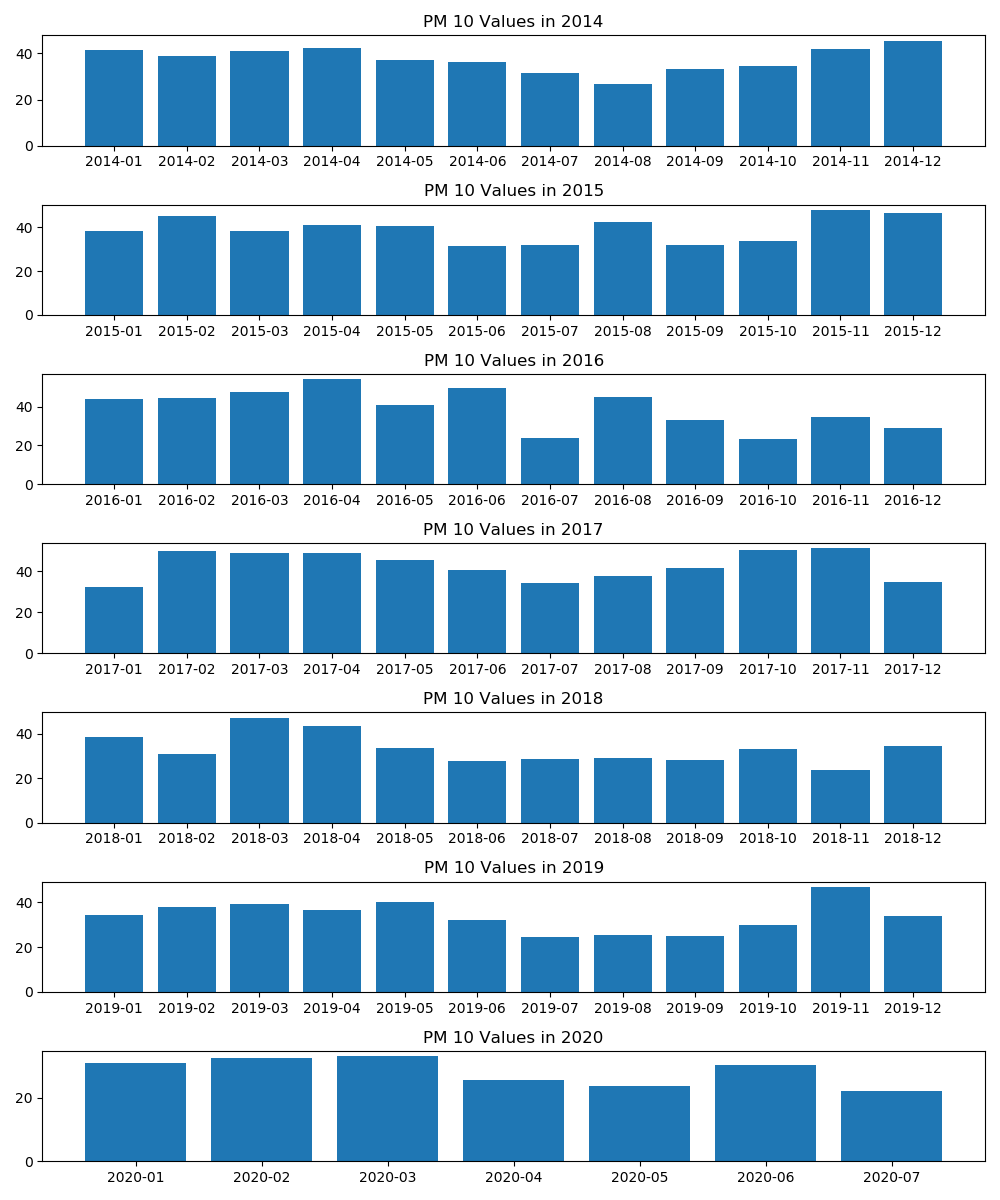

In [60]:
fig, axs = plt.subplots(len(df_month.Year.unique()), 1, figsize=(10,12))

for k, year in zip(range(len(df_month.Year.unique())), range(int(df_month.Year.min()),int(df_month.Year.max())+1)):
    year_mask = (df_month.Year == str(year))
    axs[k].bar(df_month[year_mask].index, df_month[year_mask].Mean)
    axs[k].set_title("PM 10 Values in " + str(year))
    
plt.tight_layout()

<IPython.core.display.Javascript object>


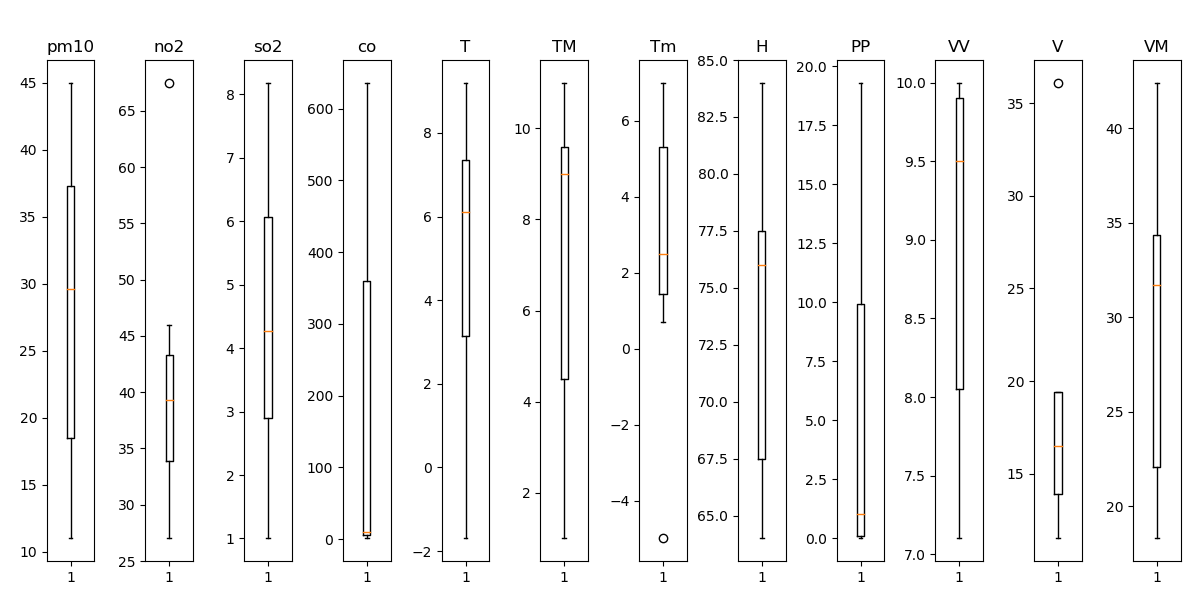

In [59]:
fig, axs = plt.subplots(1, len(df_year.columns)-3, figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(top=.9)

for num, cols in zip(range(len(df_year.columns)-3), df_year.columns[1:-2]):
    axs[num].boxplot(df_year[cols])
    axs[num].set_title(df_year[cols].name)


#### Visualization of Dataset filtered by Year

In [53]:
df_month.head()

,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year,Mean
Date,,,,,,,,,,,,,,,
2014-01,18.000000,27.000000,2.000000,7.000000,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,01,2014,41.3226
2014-02,15.000000,34.500000,1.000000,7.000000,5.7,7.2,3.0,71.0,0.00,10.0,22.6,31.7,02,2014,38.8929
2014-03,41.275862,37.033333,2.366667,4.107143,10.6,14.0,8.2,72.0,0.25,9.8,2.6,14.8,03,2014,41.2759
2014-04,52.000000,41.000000,3.000000,5.000000,11.4,15.0,5.0,73.0,0.00,8.9,6.5,20.6,04,2014,42.5
2014-05,25.000000,47.000000,2.000000,1.000000,15.0,18.0,12.5,79.0,3.30,10.0,4.1,18.3,05,2014,37.2581


<IPython.core.display.Javascript object>


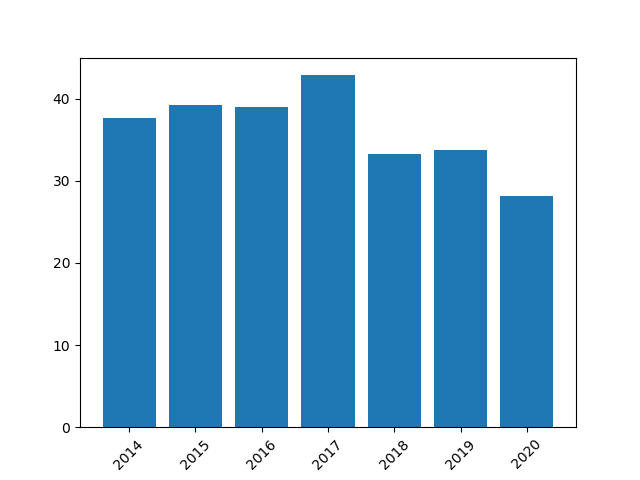

In [54]:
fig, ax = plt.subplots()

ax.bar(df_year.index, df_year.Mean)
plt.xticks(rotation=45);

<IPython.core.display.Javascript object>


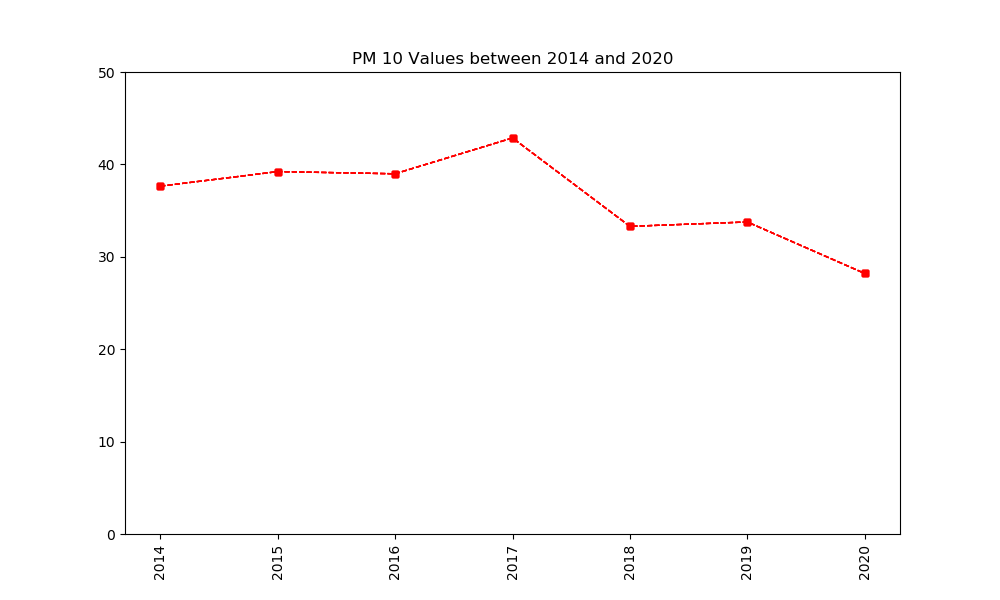

In [55]:
fig, axs = plt.subplots(figsize=(10, 6))

for year in range(int(df_year.index.min()),int(df_year.index.max())+1):
    axs.plot(df_year.Mean, marker="s", ls="--", lw=1, alpha=0.7, color="r", markersize=4, label="Year")
    axs.set_title("PM 10 Values between 2014 and 2020")

plt.xticks(rotation=90)
plt.ylim([0, 50]);

Enter a year between 2014 - 2020
Start Year: 2015
End Year: 2016


<IPython.core.display.Javascript object>


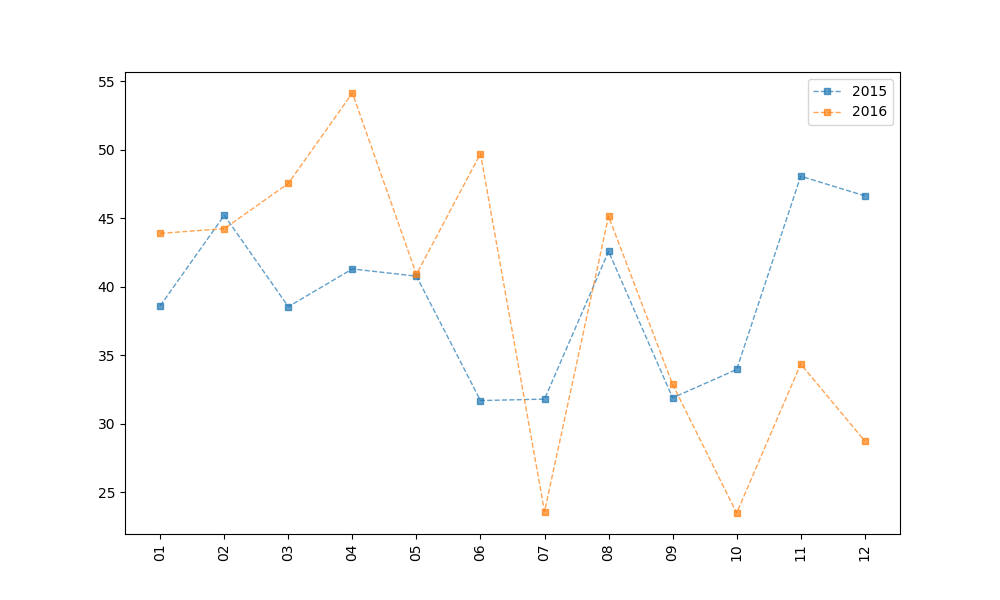

In [124]:
while True:

    print("Enter a year between 2014 - 2020")
    x = input("Start Year: ")
    y = input("End Year: ")
    
    if x >= "2014" and y <= "2020":
        break
        
    
fig, axs = plt.subplots(figsize=(10, 6))

for year in range(int(x), int(y)+1):
    year_mask = (df_month.Year == str(year))

    axs.plot(df_month[year_mask].set_index("Month").Mean, marker="s", ls="--", lw=1, alpha=0.7, markersize=4)
    #axs[k].set_title("PM 10 Values in " + str(year))
    plt.xticks(rotation=90)
    plt.legend([x for x in range(int(x), int(y)+1)])
#plt.tight_layout()



<IPython.core.display.Javascript object>


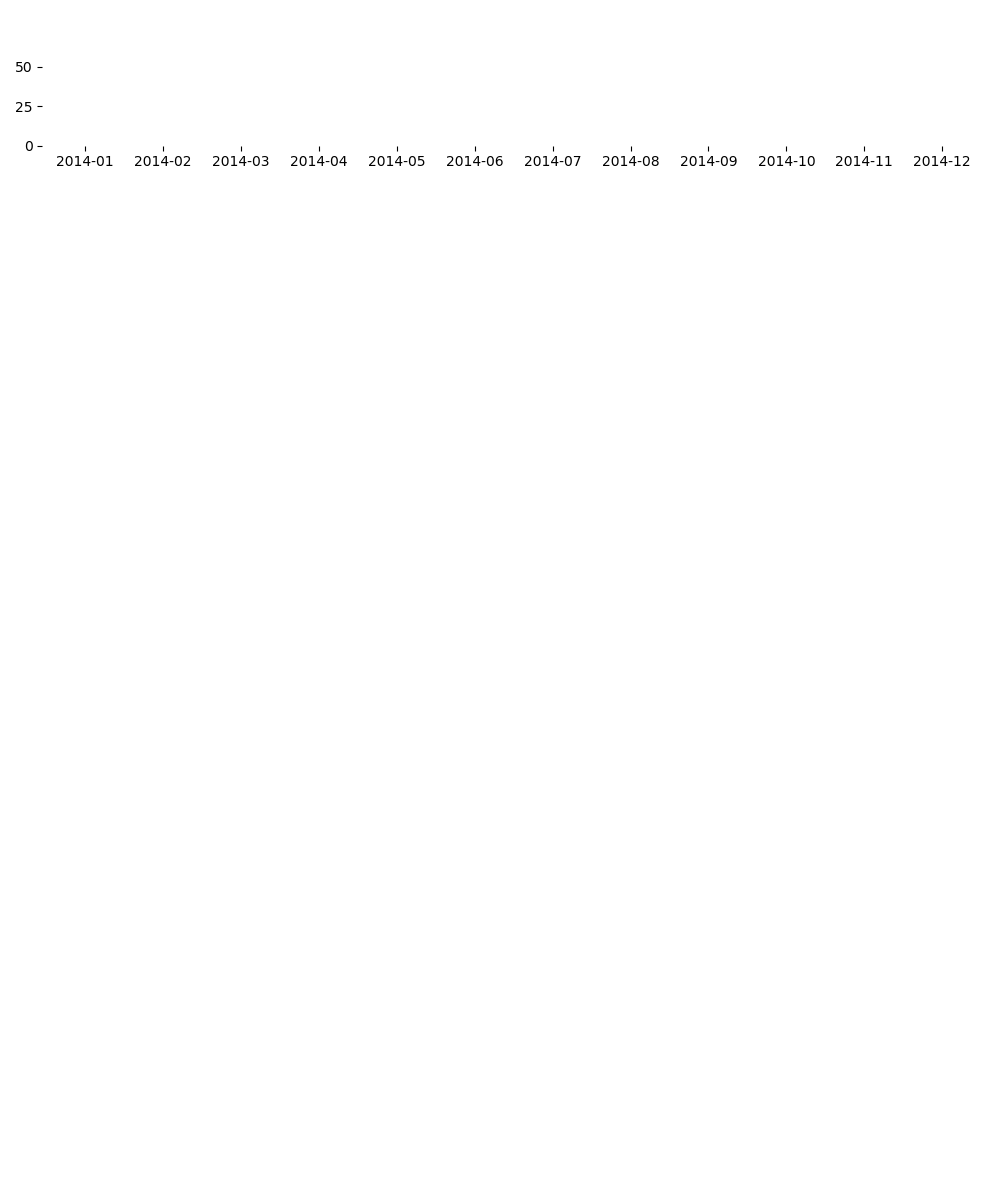

In [127]:
fig, axs = plt.subplots(len(df_month.Year.unique()), 1,figsize=(10, 12))

for num, year in zip(range(len(df_month.Year.unique())),range(int(df_month.Year.min()),int(df_month.Year.max())+1)):

    year_mask = (df_month.Year == str(year))
    #axs[num].set_xticks(rotation=90)
    axs[num].set_ylim(0,70)

    axs[num].plot(df_month[year_mask].Mean, marker="s", ls="--", lw=1, alpha=0.7, markersize=4, color="-g")
    axs[num].set_title("PM 10 Values in " + str(year))
plt.tight_layout()


In [ ]:
#fig, axs = plt.subplots(len(month_grouped_combined_df.first().Year.unique()), 1, figsize=(10,12))
#
#for k, year in zip(range(7), range(int(month_grouped_combined_df.first().Year.min()),int(month_grouped_combined_df.first().Year.max())+1)):
#    year_mask = month_grouped_combined_df.first().Year == str(year)
#    df = month_grouped_combined_df.first()[year_mask]
#    axs[k].bar(df.index, df.pm10)
#    axs[k].set_title("PM 10 Values in " + str(year))
#    
#plt.tight_layout()


???????????????????????????????????????????????????????????

<IPython.core.display.Javascript object>


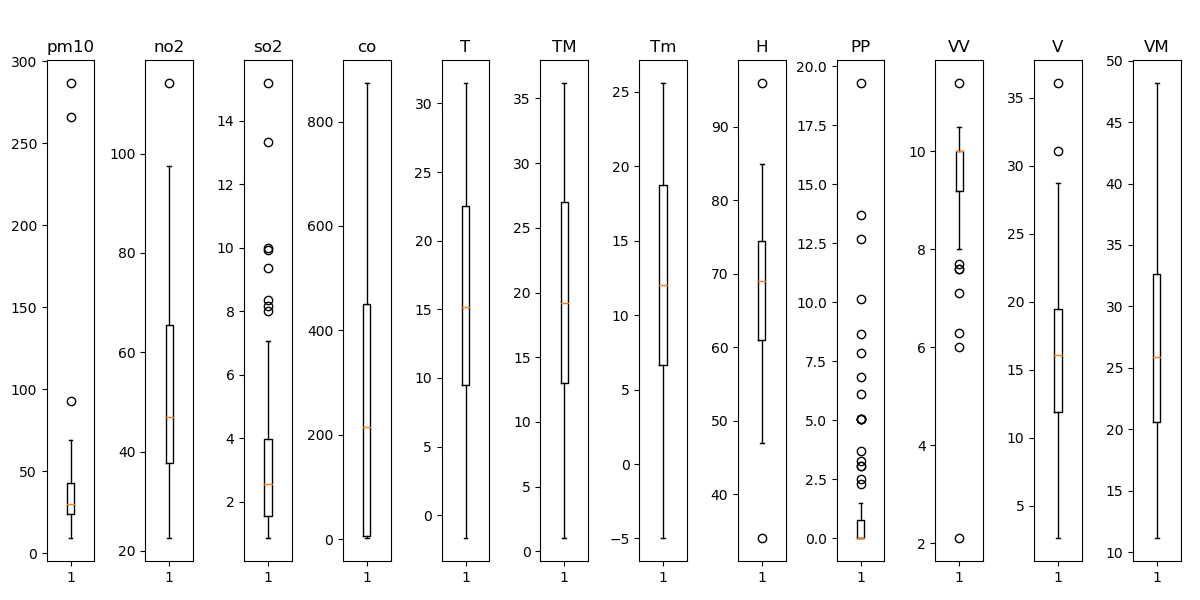

In [88]:
fig, axs = plt.subplots(1, len(month_grouped_combined_df.first().columns)-2, figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(top=.9)

for num, cols in zip(range(len(month_grouped_combined_df.first().columns)-2), month_grouped_combined_df.first().columns[:-2]):
    df = month_grouped_combined_df.first()
    axs[num].boxplot(df[cols])
    axs[num].set_title(df[cols].name);


#### Visualization of Full Dataset

In [107]:
combined_df.head()

,Date,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year
0,2014-01,18.0,27.0,2.0,7.0,7.700,9.0000,6.30000,84.000000,0.000000,7.10000,11.50000,18.3,01,2014
1,2014-01,27.0,31.0,3.0,9.0,8.800,11.0000,7.00000,73.000000,0.000000,9.80000,8.70000,16.5,01,2014
2,2014-01,31.0,30.0,2.0,8.0,9.000,11.0000,7.50000,83.000000,0.510000,8.40000,10.20000,14.8,01,2014
3,2014-01,27.0,30.0,2.0,10.0,9.075,12.1375,6.04375,77.533333,0.413125,7.25625,13.41875,22.8,01,2014
4,2014-01,46.0,34.0,3.0,8.0,9.075,12.1375,6.04375,77.533333,0.413125,7.25625,13.41875,22.8,01,2014


<IPython.core.display.Javascript object>


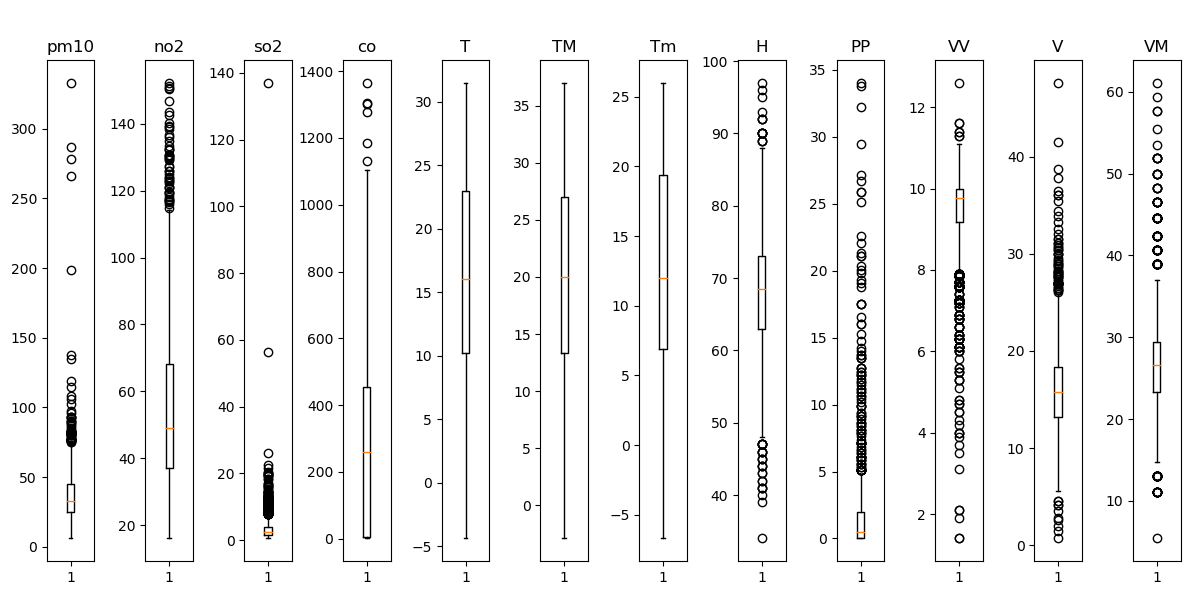

In [108]:
fig, axs = plt.subplots(1, len(combined_df.columns[1:-2]), figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(top=.9)

for num, cols in zip(range(len(combined_df.columns[1:-2])), combined_df.columns[1:-2]):
    
    axs[num].boxplot(combined_df[cols])
    axs[num].set_title(combined_df[cols].name)


# Feature Selection

### Before Feature Selection Methods have been applied (using all features)

In [ ]:
X = combined_df.drop("pm10", axis=1)
y = combined_df.pm10

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=101)

rf_model = RandomForestRegressor().fit(X_train, y_train)
predictions = rf_model.predict(X_test)


## Feature Selection w/ Univariate Method

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2


## Feature Selection w/ Correlation Matrix

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(combined_df.corr(), annot=True, lw=1, cmap="YlGnBu")

In [ ]:
combined_df.corr()["pm10"].abs().nlargest(5)